<a href="https://colab.research.google.com/github/Natali1599/MineriaDatos/blob/main/Taller_NataliHernandez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Taller modelos lineales

# Parte 1 - Regresión lineal

Estimar una regresión con los datos de ingresos


## Previsión de ingresos

Vamos a trabajar con un conjunto de datos del censo de EE.UU. indome ([diccionario de datos](https://archive.ics.uci.edu/ml/datasets/Adult))

A muchas empresas les gustaría personalizar su oferta en función de los ingresos del cliente. Los clientes con ingresos elevados podrían, por ejemplo, estar expuestos a productos premium. Como los ingresos de un cliente no siempre se conocen explícitamente, el modelo predictivo podría estimar los ingresos de una persona basándose en otra información.

Nuestro objetivo es crear un modelo predictivo que sea capaz de dar una estimación de los ingresos de una persona.


In [43]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
income = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/income.csv.zip', index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [44]:
income.shape

(32561, 15)

# Ejercicio 4.1 

¿Cuál es la relación entre la edad y la renta?



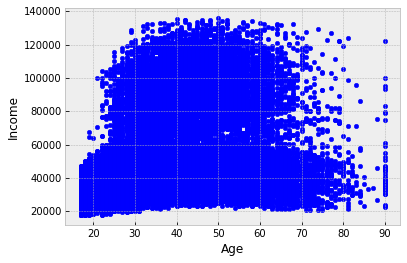

In [45]:
income.plot(x='Age', y='Income', kind='scatter')

El tipo de relación entre la edad y los ingresos es aparentemente lineal.

In [46]:
corr = income.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,Income
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.290408
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.014618
Education-Num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.430757
Capital Gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.214634
Capital Loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.147597
Hours per week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.283949
Income,0.290408,-0.014618,0.430757,0.214634,0.147597,0.283949,1.000000


La relación entre la edad y renta es positiva lo que indica que a medida de que la persona tenga más años, da lugar a un pago más alto (o quizás experiencia), así mismo a medida que tenga menos años sus ingresos bajan o se mantienen. Aunque si tiene correlación positiva es muy baja.

In [47]:
income['Income'].describe()

count     32561.000000
mean      53455.809158
std       25465.530461
min       17636.000000
25%       35503.000000
50%       44978.000000
75%       63548.000000
max      136063.000000
Name: Income, dtype: float64

Dada la escala de los valores, no considero que sea necesario estandarizar las variables.  

# Ejercicio 4.2
Para un aumento del uno por ciento en la edad, ¿cuánto aumenta la renta?
Utilizando sklearn estime una regresión lineal y prediga los ingresos cuando la Edad es de 30 y 40 años.

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
linreg = LinearRegression()

In [50]:
feature_cols = ['Age']
X = income[feature_cols]

linreg.fit(X, income.Income)

LinearRegression()

In [51]:
linreg.coef_

array([542.16765707])

Por cada unidad que incrementa la edad la renta aumenta en 542.168 

In [52]:
x = np.array([[30],[40]])

linreg.predict(x)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([48803.11784304, 54224.79441376])

Las predicciones de los ingresos para las edades de 30 y 40 años son 48803.12 y 54224.79


# Ejercicio 4.3

Ejecute un modelo de regresión utilizando como características la Edad y la Edad$^2$ utilizando las ecuaciones OLS. Prediga de nuevo los ingresos cuando la Edad es de 30 y 40 años, y compare con el modelo anterior.

# Ejercicio 4.4
Estime una regresión utilizando más características, diga cuáles y por qué las usó. Prediga de nuevo los ingresos cuando la Edad es de 30 y 40 años, y compare con el modelo anterior.


## Ejercicio 4.5

Utilizando las características seleccionadas en el punto anterior, parta la base en training (90%) y validación (10%). Posterior, con la bases de training (90%) aplique un modelo de regresión lineal usando K fold cross validation:
* K = 2
* K = 5
* K = 10

Calcule el MSE de test y el MSE de validación (10% restante) y compare los modelos.


In [53]:
from sklearn.model_selection import train_test_split
X = income[["Age", "Capital Gain", "Capital Loss", "Hours per week"]]
y = income["Income"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,random_state = 1 )

In [54]:
# k-fold CV 
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=2)
scores      

array([0.20416448, 0.19472153])

In [55]:
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
scores      

array([0.18497678, 0.21775579, 0.1956123 , 0.20502293, 0.19242534])

In [56]:
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=10)
scores      

array([0.18686524, 0.18274539, 0.22226529, 0.21312997, 0.21369398,
       0.17797583, 0.21911063, 0.19105429, 0.18527598, 0.19981935])

In [57]:
from sklearn.model_selection import GridSearchCV
lr_model = LinearRegression()
parameters = {'normalize':[True,False]}
clf = GridSearchCV(lr_model, parameters, refit=True, cv=10)
best_model = clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

In [58]:
from sklearn.metrics import mean_squared_error
y_pred = best_model.predict(X_test)

print("MSE",mean_squared_error(y_test, y_pred))

MSE 505510928.96204424


#Parte 2: Regresión Logística

### Customer Churn: 
La pérdida/abandono de los clientes de la empresa. Especialmente, las industrias que la adquisición de usuarios es costosa, es de crucial importancia para una empresa para reducir e idealmente hacer que la rotación de clientes a 0 para mantener sus ingresos recurrentes. Si se considera que la retención de clientes es siempre más barata que la adquisición de clientes y generalmente depende de los datos del usuario (uso del servicio o producto), plantea un gran/excitante/difícil problema para el aprendizaje automático.

### Datos
El conjunto de datos procede de un proveedor de servicios de telecomunicaciones en el que se recoge el uso del servicio (plan internacional, plan de buzón de voz, uso diurno, uso nocturno, etc.) y la información demográfica básica (estado y código de área) del usuario. En el caso de las etiquetas, tengo un único punto de datos que indica si el cliente ha sido dado de baja o no.


In [59]:
# Download the dataset
plt.style.use('bmh')
data = pd.read_csv('https://github.com/ghuiber/churn/raw/master/data/churn.csv')

In [60]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Ejercicio 4.6

¿Cuál es la distribución de los churners? Haga la transformación correspondiente para predecir Churn. (0-FAlse, 1-True)



In [61]:
data['churn'] = data['Churn?'].map({'False.':0, 'True.':1})
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,0


Text(0, 0.5, 'Churn')

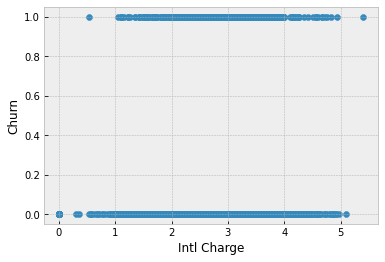

In [62]:
plt.scatter(data['Intl Charge'], data['churn'])
plt.xlabel('Intl Charge')
plt.ylabel('Churn')

# Ejercicio 4.7
Entrene una Regresión Logística creando Y y X con la información en IntlCharge.


In [63]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

feature_cols = ['Intl Charge']
X = data[feature_cols]
y = data.churn

linreg.fit(X, y)
data['pred'] = linreg.predict(X)
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,churn,pred
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,False.,0,0.142856
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,False.,0,0.174737
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,False.,0,0.161666
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,False.,0,0.113524
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,False.,0,0.143812


Text(0, 0.5, 'Churn')

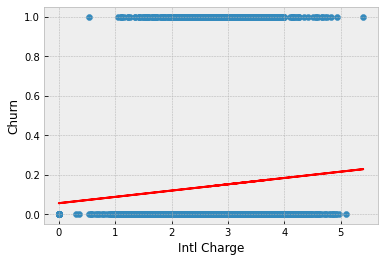

In [64]:
plt.scatter(data['Intl Charge'], data.churn)
plt.plot(data['Intl Charge'], data.pred, color='red')
plt.xlabel('Intl Charge')
plt.ylabel('Churn')

# Ejercicio 4.8

¿Cuáles son los coeficientes de la regresión logística? Interpretelos para un valor de IntlCharge = 1.




# Ejercicio 4.9

Seleccione 3 variables independientes para entrenar una regresión logística. Interprete cada uno de los valores de los coeficientes en función de la variable churn.


Las variables que seleccione IntCharge, DayCharge, NigthCharge

In [65]:
linreg = LinearRegression()

feature_cols = ['Intl Charge','Night Charge','Day Charge']
X = data[feature_cols]
y = data.churn

linreg.fit(X, y)
data['pred'] = linreg.predict(X)
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,churn,pred
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,False.,0,0.267131
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,False.,0,0.165003
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,False.,0,0.237430
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,False.,0,0.270406
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,False.,0,0.122913


In [66]:
print(linreg.intercept_)
print(linreg.coef_)


-0.23555937028463103
[0.03310483 0.00552065 0.00782172]


Para cada unidad que incrementa hay un 0.0331 en la variable "Intl Charge", también un incremento en la variable "Nigth Charge" de 0.00552 y para un incremento en una unidad en la variable "Day charge" la probabilidad es de 0.07821,mientras las demás quedan constantes.

In [67]:
data['churn_pred_class'] = np.where(data.pred >= 0.5, 1, 0)
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,churn,pred,churn_pred_class
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,91,11.01,10.0,3,2.70,1,False.,0,0.267131,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,11.45,13.7,3,3.70,1,False.,0,0.165003,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,104,7.32,12.2,5,3.29,0,False.,0,0.237430,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,89,8.86,6.6,7,1.78,2,False.,0,0.270406,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,121,8.41,10.1,3,2.73,3,False.,0,0.122913,0


Text(0, 0.5, 'churn')

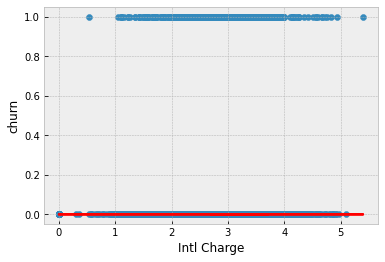

In [68]:
plt.scatter(data['Intl Charge'], data.churn)
plt.plot(data['Intl Charge'], data.churn_pred_class, color='red')
plt.xlabel('Intl Charge')
plt.ylabel('churn')

## Ejercicio 4.10

Utilizando las 3 variables independientes del punto anterior, particione la base en training (90%) y validación (10%). Posterior, con la bases de training (90%) aplique un modelo de regresión logística usando K fold cross validation:
* K = 2
* K = 5
* K = 10

Calcule la precisión de test y la precisión de validación(10% restante) y compare los modelos.